# Manually choosing parameters
### SARIMA(p,d,q)(P,D,Q)m

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67246D+00    |proj g|=  1.91832D-01

At iterate    5    f=  3.56562D+00    |proj g|=  4.96323D-02

At iterate   10    f=  3.47346D+00    |proj g|=  4.24745D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     10     15      1     0     0   4.247D-02   3.473D+00
  F =   3.4734592758088869     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


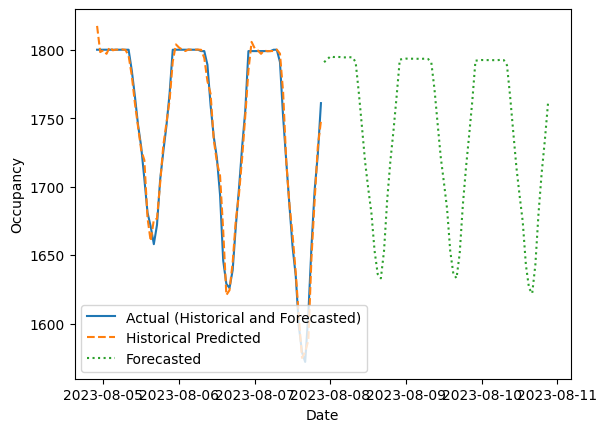

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from sarimax import pre_process
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import pmdarima as pmd
from sarimax import find_parameters

In [262]:
df = pre_process(csv_data_file_path='./Data/bbtable_data.csv', resample_period='H')
df = df.iloc[800:-1300] # Last values are empty for the holidays, so barely any attendance (ignore due to small data size)

In [246]:
print(adfuller(df))
# Statistically test for stationary (weak) data, as prerequisite for ARIMA
# Critical value if within range of CI, hence we don't have evidence to reject H0 (data is not stationary)

(-2.345919684947782, 0.1575851767995861, 18, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 4628.930414384908)


Not stationary, so we apply differencing.

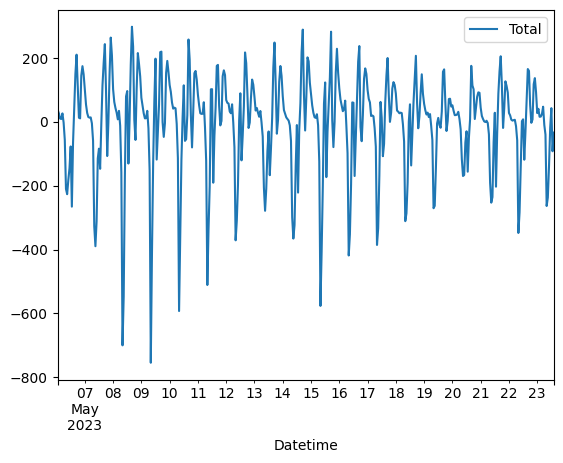

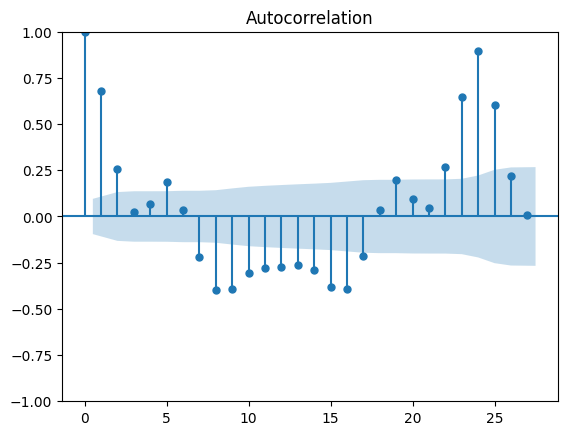

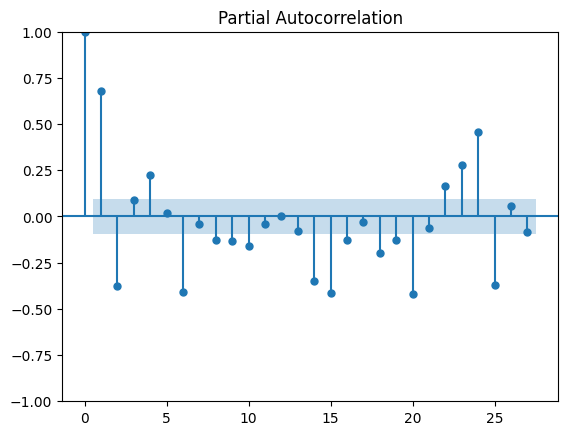

(-13.11000931427904, 1.6422353718051293e-24, 18, 403, {'1%': -3.4466811208382437, '5%': -2.8687386420385494, '10%': -2.5706046655665635}, 4608.636945234437)


In [247]:
df_diff = df.diff().iloc[1:] # could also just do dropna() but want to be sure exactly what's happening
df_diff.plot()
plt.show()
print(adfuller(df_diff))# Makes a statistically significant different!

In [248]:
# df_diff_2 = df_diff.diff().iloc[1:] # difference twice, don't end up using
# df_diff_2.plot()
# plt.show()
# Could difference again, but would add extra noise (seen in plot) and differenced data already satisfies  Dicky-Fuller test.

In [249]:
# Could also use pmdarima package to automatically find differencing...
ndiff = pmd.arima.ndiffs(df['Total'])
print(f"Number of differencing recommended {ndiff}")
# pmd.arima.nsdiff() to get seasonality differencing

Number of differencing recommended 0


As test statistic for a single differencing is less than the  critical value for a significance level of 0.5, we have sufficient evidence to reject the null that it is not stationary). Hence, d = 1

0


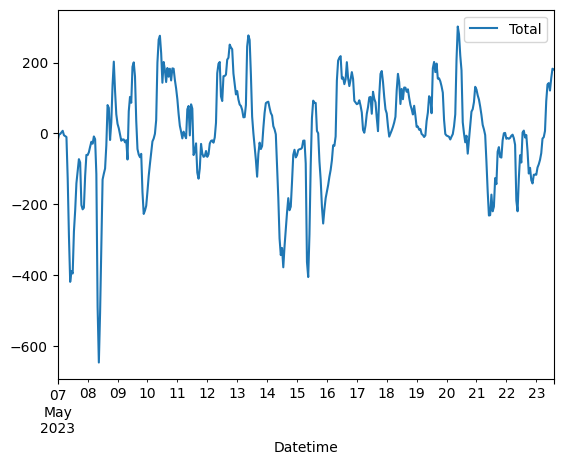

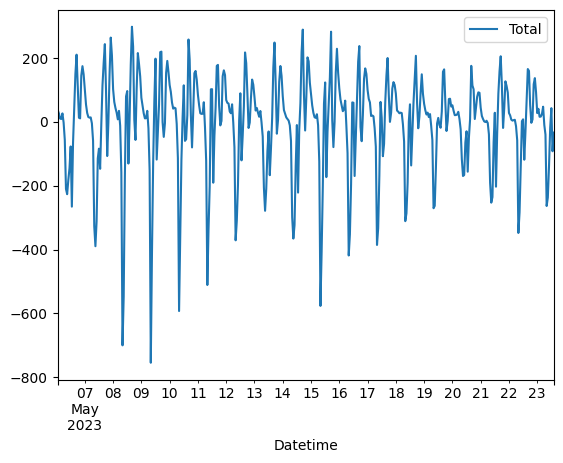

(-2.345919684947782, 0.1575851767995861, 18, 404, {'1%': -3.44664043608676, '5%': -2.868720756230461, '10%': -2.5705951311145965}, 4628.930414384908)
(-5.519875775064898, 1.8881802386437875e-06, 2, 396, {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}, 4061.304058538131)


In [251]:
print(pmd.arima.ndiffs(df))
df_diff_season = df.diff(24)
df_diff_season = df_diff_season.dropna()
df_diff_season.plot()
df_diff.plot()
plt.show()
print(adfuller(df))
print(adfuller(df_diff_season))
# From ADT test we can determine that a differencing with a lag of m=24 will make our data stationary. So we have D = 1

With observation and exploration (seasonal_decomposition, acf and pacf plots), I believe I should difference both d=1 and D=1. However, the pmdarima functions ndiffs() and nsdiff() suggest I shouldn't. I will continue doing so, but check back once I have more data and/or parameter hypertune.
Hence d = 1, D = 1

/var/folders/gg/2xgfrwhs60j8qg5zm5gbky_c0000gn/T/ipykernel_95326/244868818.py:3: UserWarning: The figure layout has changed to tight
  fig.tight_layout()
/var/folders/gg/2xgfrwhs60j8qg5zm5gbky_c0000gn/T/ipykernel_95326/244868818.py:7: UserWarning: The figure layout has changed to tight
  fig2.tight_layout()


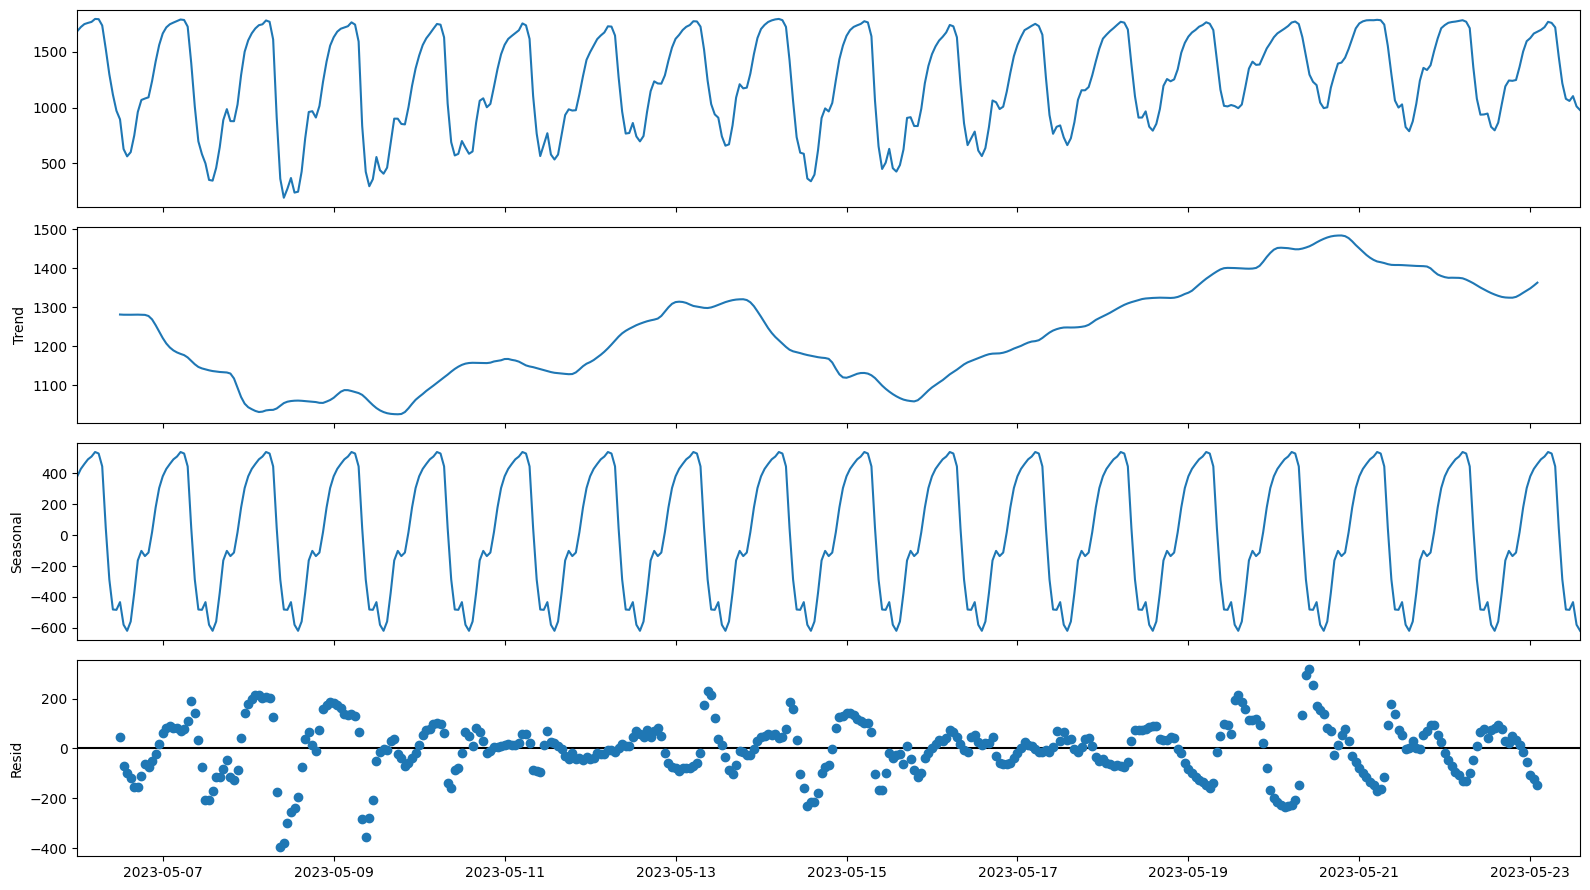

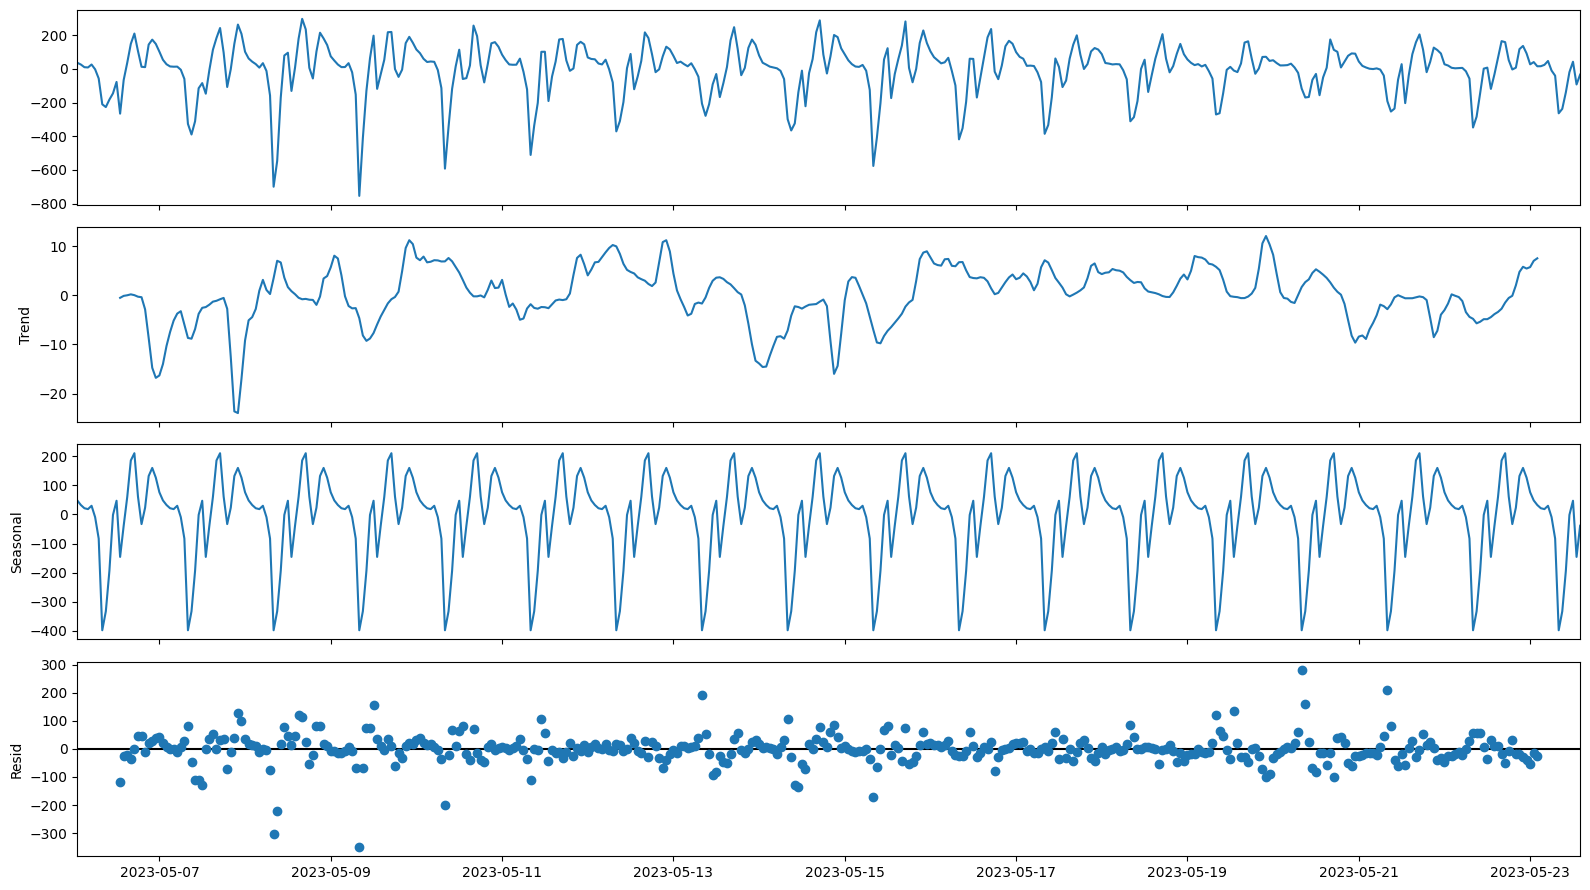

/var/folders/gg/2xgfrwhs60j8qg5zm5gbky_c0000gn/T/ipykernel_95326/244868818.py:12: UserWarning: The figure layout has changed to tight
  fig2.tight_layout()


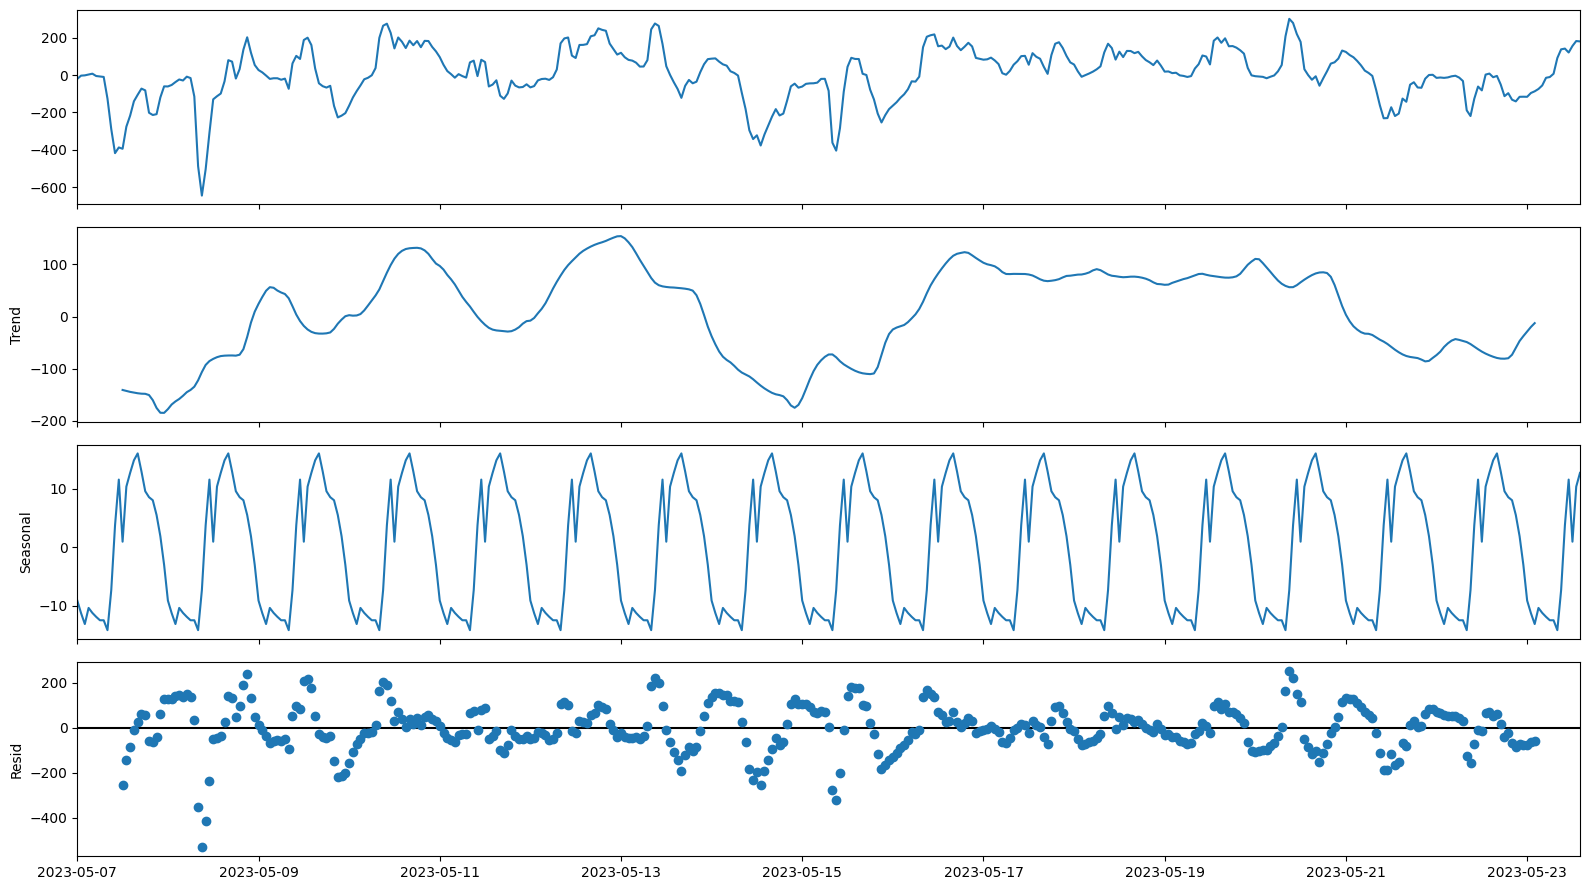

In [253]:
fig = seasonal_decompose(df).plot()
fig.set_size_inches((16, 9))
fig.tight_layout()

fig2 = seasonal_decompose(df_diff).plot()
fig2.set_size_inches((16, 9))
fig2.tight_layout()
plt.show()

fig2 = seasonal_decompose(df_diff_season).plot()
fig2.set_size_inches((16, 9))
fig2.tight_layout()
plt.show()
# Data visually seems to follow stationary patterns
# Very strong seasonal component, (S)ARIMA

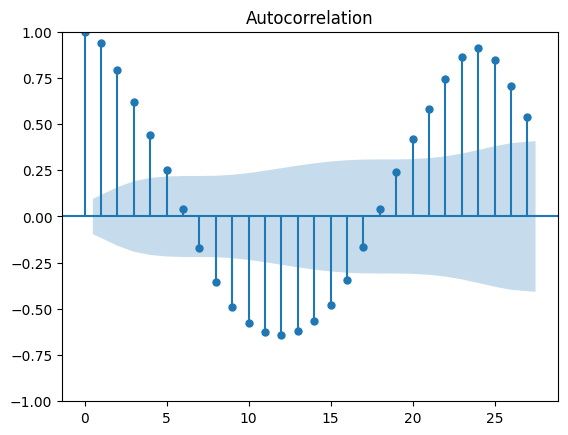

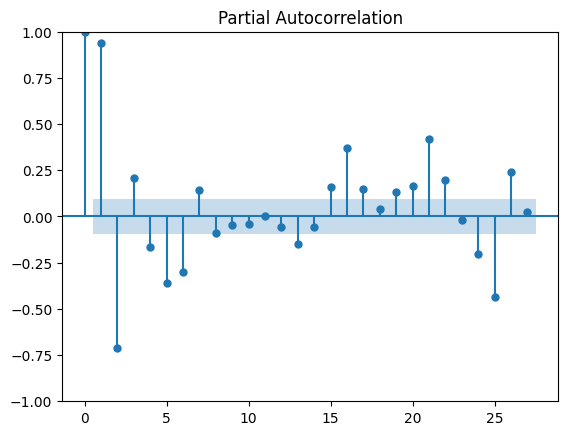

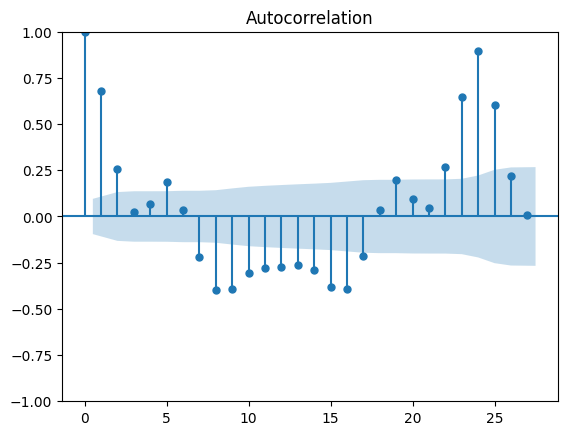

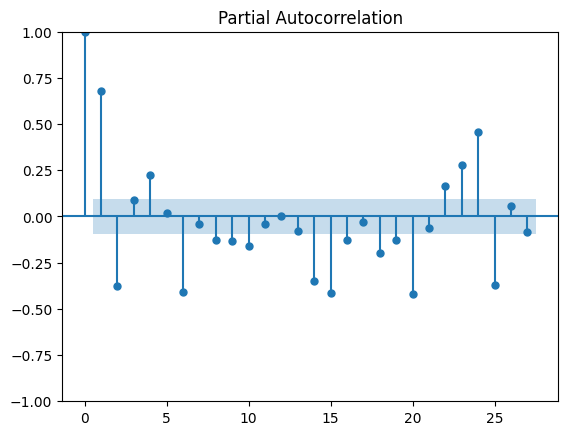

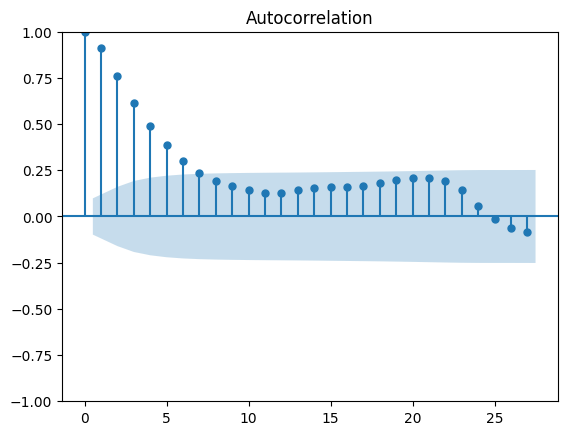

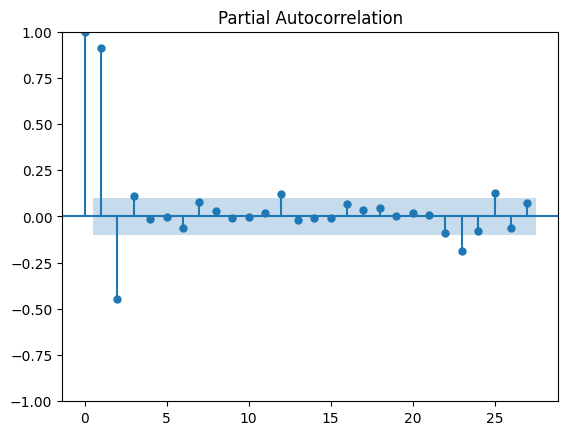

In [254]:
plot_acf(df)
plot_pacf(df)
plt.show()


plot_acf(df_diff)
plot_pacf(df_diff)
plt.show()


plot_acf(df_diff_season)
plot_pacf(df_diff_season)
plt.show()

In [263]:
find_parameters(df=df, col='Total')
find_parameters(df=df_diff, col='Total')
find_parameters(df=df_diff_season, col='Total')

TypeError: find_parameters() got an unexpected keyword argument 'df'